                          MULTIVARIANT LINEAR REGRESSION using hiring dataset

In [13]:
pip install word2number

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5590 sha256=a988486fc6e270ab75903ada448fcbc28fd22828ea95499826a702464eda41fc
  Stored in directory: c:\users\sasi rekha\appdata\local\pip\cache\wheels\aa\2b\71\ede4a3c3520a8374778c16c345e0e78e25d1ffe38f4c5c1e8a
Successfully built word2number
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: Building 'word2number' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'word2number'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [16]:
print(w2n.word_to_num('one hundred thirty five'))

135


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from word2number import w2n
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
#Reading the Dataset
df=pd.read_csv("hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [20]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [21]:
df.experience=df.experience.fillna('Zero')

In [22]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,Zero,8.0,9,50000
1,Zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [23]:
# Apply word_to_num (to convert word to number in experience row)

df.experience=df.experience.apply(w2n.word_to_num)

In [24]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  8 non-null      int64  
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 388.0 bytes


In [26]:
df.describe()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
count,8.00000,7.000000,8.000000,8.00000
mean,4.75000,7.857143,7.875000,63000.00000
std,4.26782,1.345185,1.642081,11501.55269
min,0.00000,6.000000,6.000000,45000.00000
25%,1.50000,7.000000,6.750000,57500.00000
50%,4.00000,8.000000,7.500000,63500.00000
75%,7.75000,8.500000,9.250000,70500.00000
max,11.00000,10.000000,10.000000,80000.00000


In [27]:
import math
median_test_score=math.floor(df['test_score(out of 10)'].mean())
median_test_score

7

   mean value of test_score(out of 10)

In [29]:
dff=df['test_score(out of 10)'].mean()
dff

np.float64(7.857142857142857)

In [32]:
# to use fillna
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(dff)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


In [33]:
df.columns

Index(['experience', 'test_score(out of 10)', 'interview_score(out of 10)',
       'salary($)'],
      dtype='object')

                              MULTIVARIANT LINEAR REGRESSION
                                  Features Selection- more than one columns to assign one variable as x

       here we use the column name experience', 'test_score(out of 10)', 'interview_score(out of 10) as the variable name predictors                            

In [34]:
predictors = ['experience', 'test_score(out of 10)', 'interview_score(out of 10)']
x=df[predictors]
y=df['salary($)']

                               Split Train and Test datasets

In [35]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
x_train.shape,x_test.shape

((6, 3), (2, 3))

In [38]:
y_train.shape,y_test.shape

((6,), (2,))

In [42]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
model=reg.fit(x_train,y_train)

In [46]:
model.predict([[7,9.00000,6]])

C:\Users\SASI REKHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([68556.70020231])

In [48]:
m1=model.score(x_train,y_train)
print(round(m1),'%')

1 %


In [50]:
model.score(x_test,y_test)


0.9287916364000984

In [39]:
x_pred=reg.predict(x_train)
y_pred=reg.predict(x_test)

ValueError: x and y must be the same size

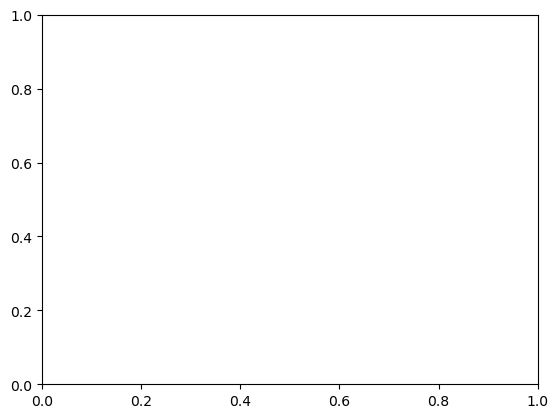

In [47]:
#TRAINING DATASET 
plt.scatter(x_train,y_train,color='green')
plt.plot(x_train,x_pred,color='red')
plt.title('HIRING (Training Dataset)')
plt.xlabel('experience')
plt.ylabel('Training')
plt.show()